# scikit-learn classification of single frames
Here we compare the performance of different scikit-learn classification algorithms but using a sinle frame approach.

* LogisticRegression
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* GradientBoostingClassifier

In [1]:
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_hdf("merged_20210405.h5")
df = df[(df['behavior'] != "not_defined")]
y = df['behavior']

features = [('head', 'x'), ('head', 'y'), 
            ('tail', 'x'), ('tail', 'y'),  
            
            ('left_neck', 'x'), ('left_neck', 'y'), 
            ('right_neck', 'x'), ('right_neck', 'y'), 
            
            ('left_up_wing', 'x'), ('left_up_wing', 'y'),
            ('left_middle_wing', 'x'), ('left_middle_wing', 'y'),
            ('left_down_wing', 'x'), ('left_down_wing', 'y'),
            
            ('right_up_wing', 'x'), ('right_up_wing', 'y'),
            ('right_middle_wing', 'x'), ('right_middle_wing', 'y'),
            ('right_down_wing', 'x'), ('right_down_wing', 'y'),
]

# X as (n_samples, n_features) shape numpy array
X = df[features].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(verbose=True).fit(x_train, y_train)
predictions = clf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\kevin\.virtualenvs\winkie-tu0wptfo\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.9s finished


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                   precision    recall  f1-score   support

    back_preening       0.73      0.49      0.58      4277
        body_pump       0.50      0.14      0.22      1195
           eating       0.91      0.98      0.94     71454
 feather_clapping       0.49      0.19      0.27      4305
   front_preening       0.19      0.02      0.04      8457
       head_shake       0.00      0.00      0.00      1752
scratch_with_feet       0.08      0.01      0.01      1061
         standing       0.76      0.95      0.85     71823
 standing_shaking       0.09      0.01      0.02      1708
       tail_shake       0.23      0.01      0.01      1319
          walking       0.28      0.04      0.08      5759

         accuracy                           0.82    173110
        macro avg       0.39      0.26      0.28    173110
     weighted avg       0.75      0.82      0.77    173110



In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)
predictions = neigh.predict(x_test)
print(classification_report(y_test, predictions))

                   precision    recall  f1-score   support

    back_preening       0.96      0.97      0.97      4277
        body_pump       0.86      0.77      0.81      1195
           eating       1.00      1.00      1.00     71454
 feather_clapping       0.92      0.92      0.92      4305
   front_preening       0.98      0.98      0.98      8457
       head_shake       0.97      0.88      0.93      1752
scratch_with_feet       0.97      0.97      0.97      1061
         standing       0.99      1.00      0.99     71823
 standing_shaking       0.96      0.98      0.97      1708
       tail_shake       0.89      0.69      0.78      1319
          walking       0.94      0.94      0.94      5759

         accuracy                           0.99    173110
        macro avg       0.95      0.92      0.93    173110
     weighted avg       0.99      0.99      0.99    173110



In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

                   precision    recall  f1-score   support

    back_preening       0.91      0.91      0.91      4277
        body_pump       0.75      0.69      0.72      1195
           eating       0.99      0.99      0.99     71454
 feather_clapping       0.85      0.85      0.85      4305
   front_preening       0.90      0.90      0.90      8457
       head_shake       0.66      0.62      0.64      1752
scratch_with_feet       0.85      0.86      0.86      1061
         standing       0.97      0.98      0.97     71823
 standing_shaking       0.91      0.94      0.92      1708
       tail_shake       0.65      0.62      0.63      1319
          walking       0.79      0.78      0.78      5759

         accuracy                           0.96    173110
        macro avg       0.84      0.83      0.83    173110
     weighted avg       0.96      0.96      0.96    173110



In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

                   precision    recall  f1-score   support

    back_preening       0.98      0.98      0.98      4277
        body_pump       0.93      0.80      0.86      1195
           eating       1.00      1.00      1.00     71454
 feather_clapping       0.92      0.97      0.95      4305
   front_preening       0.98      0.98      0.98      8457
       head_shake       0.99      0.76      0.86      1752
scratch_with_feet       1.00      0.97      0.98      1061
         standing       0.99      1.00      0.99     71823
 standing_shaking       0.99      0.99      0.99      1708
       tail_shake       0.98      0.77      0.86      1319
          walking       0.95      0.94      0.95      5759

         accuracy                           0.99    173110
        macro avg       0.97      0.92      0.95    173110
     weighted avg       0.99      0.99      0.99    173110



In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
clf = GradientBoostingClassifier(random_state=0)
clf.fit(preprocessing.scale(x_train), y_train)
predictions = clf.predict(preprocessing.scale(x_test))
print(classification_report(y_test, predictions))

                   precision    recall  f1-score   support

    back_preening       0.86      0.82      0.84      4277
        body_pump       0.66      0.47      0.55      1195
           eating       0.98      0.99      0.98     71454
 feather_clapping       0.76      0.72      0.74      4305
   front_preening       0.72      0.64      0.68      8457
       head_shake       0.59      0.14      0.22      1752
scratch_with_feet       0.83      0.54      0.66      1061
         standing       0.89      0.96      0.93     71823
 standing_shaking       0.80      0.69      0.74      1708
       tail_shake       0.64      0.36      0.46      1319
          walking       0.59      0.35      0.44      5759

         accuracy                           0.91    173110
        macro avg       0.76      0.61      0.66    173110
     weighted avg       0.90      0.91      0.90    173110



In [18]:
from sklearn import svm
from sklearn import preprocessing
clf = svm.SVC()
clf.fit(preprocessing.scale(x_train), y_train)
predictions = clf.predict(preprocessing.scale(x_test))
print(classification_report(y_test, predictions))

                   precision    recall  f1-score   support

    back_preening       0.96      0.93      0.95      4277
        body_pump       0.79      0.68      0.73      1195
           eating       0.99      0.99      0.99     71454
 feather_clapping       0.81      0.89      0.85      4305
   front_preening       0.91      0.85      0.88      8457
       head_shake       0.77      0.14      0.24      1752
scratch_with_feet       0.92      0.80      0.86      1061
         standing       0.93      0.98      0.95     71823
 standing_shaking       0.90      0.89      0.90      1708
       tail_shake       0.88      0.55      0.68      1319
          walking       0.76      0.53      0.63      5759

         accuracy                           0.94    173110
        macro avg       0.87      0.75      0.79    173110
     weighted avg       0.94      0.94      0.94    173110



In [ ]:
# TODO: Use pipelines, cross validation
# Alternative metrics: ROC-AUC, avg. precision , AUPRC, f1 score
# classweights to combat imbalance

# Non shuffled train-test set

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

NameError: name 'classification_report' is not defined

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

c:\users\kevin\.virtualenvs\winkie-tu0wptfo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kevin\.virtualenvs\winkie-tu0wptfo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

    back_preening       0.75      0.87      0.81      4695
        body_pump       0.52      0.43      0.47      1722
           eating       0.98      0.98      0.98     66299
 feather_clapping       0.89      0.69      0.78     10069
   front_preening       0.16      0.45      0.23      4092
       head_shake       0.05      0.09      0.06      1589
scratch_with_feet       0.78      0.40      0.53       341
         standing       0.90      0.81      0.85     76162
 standing_shaking       0.00      0.00      0.00         0
       tail_shake       0.31      0.23      0.26      1755
          walking       0.49      0.55      0.52      6386

         accuracy                           0.83    173110
        macro avg       0.53      0.50      0.50    173110
     weighted avg       0.87      0.83      0.85    173110



c:\users\kevin\.virtualenvs\winkie-tu0wptfo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)
predictions = neigh.predict(x_test)
print(classification_report(y_test, predictions))

c:\users\kevin\.virtualenvs\winkie-tu0wptfo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kevin\.virtualenvs\winkie-tu0wptfo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

    back_preening       0.61      0.76      0.68      4695
        body_pump       0.37      0.30      0.34      1722
           eating       0.96      0.97      0.97     66299
 feather_clapping       0.79      0.46      0.58     10069
   front_preening       0.29      0.32      0.30      4092
       head_shake       0.08      0.18      0.11      1589
scratch_with_feet       0.32      0.60      0.42       341
         standing       0.90      0.87      0.88     76162
 standing_shaking       0.00      0.00      0.00         0
       tail_shake       0.31      0.23      0.27      1755
          walking       0.35      0.44      0.39      6386

         accuracy                           0.84    173110
        macro avg       0.45      0.47      0.45    173110
     weighted avg       0.85      0.84      0.84    173110



c:\users\kevin\.virtualenvs\winkie-tu0wptfo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

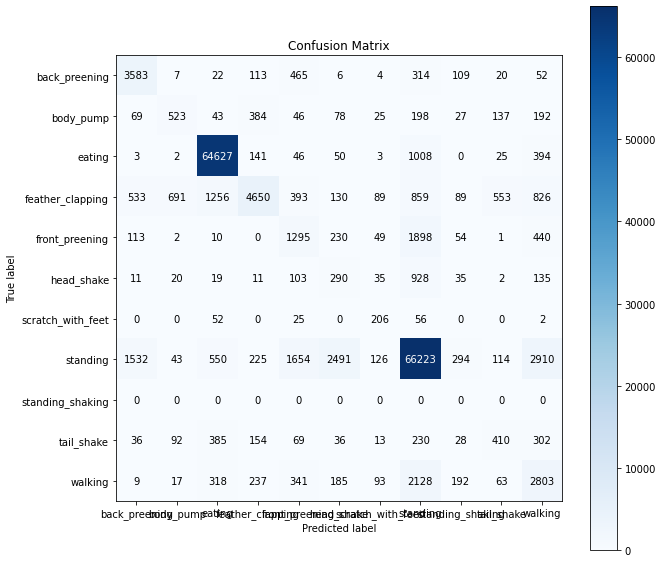

In [15]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions, figsize=(10, 10))  

<AxesSubplot:title={'center':'PCA 2-D Projection'}, xlabel='First Principal Component', ylabel='Second Principal Component'>

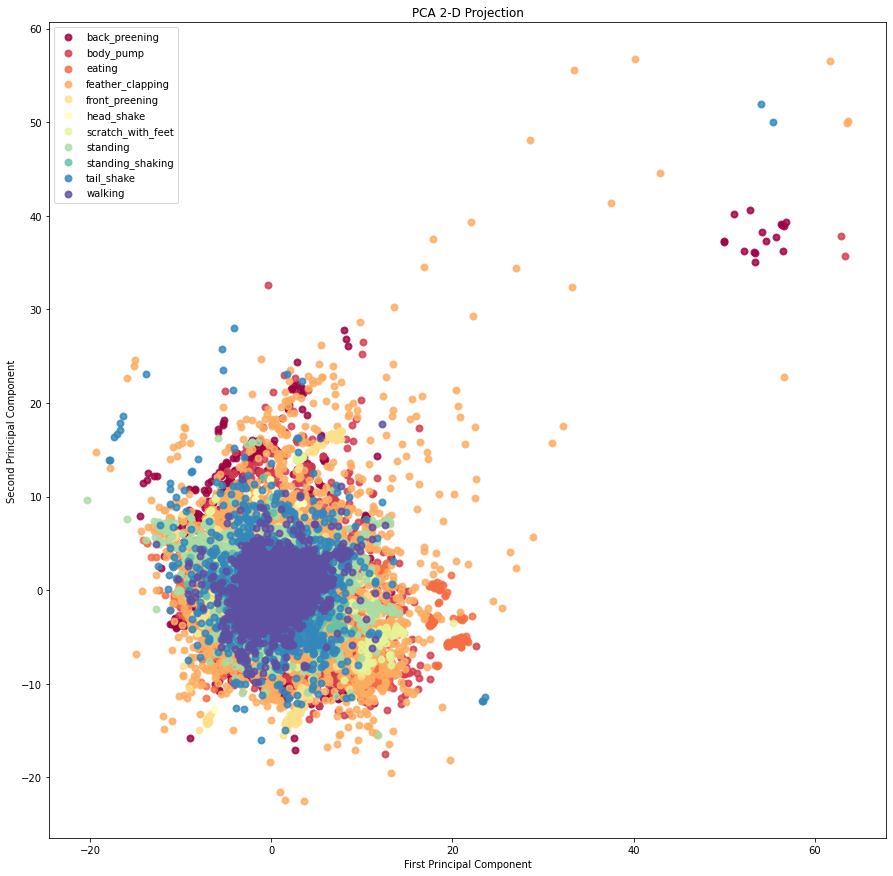

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x_train)
pca = PCA(n_components = 2)
pca.fit(x_scaled)
skplt.decomposition.plot_pca_2d_projection(pca, x_scaled, y_train, figsize=(15, 15))

In [30]:
df

bodyparts      head                               beak                         \
coords            x           y likelihood           x           y likelihood   
34600     -6.256115  133.140698   0.998600   28.458820  157.263363   0.974056   
34601      3.769024  145.079564   0.992194    1.435601  168.635165   0.998704   
34602      0.213448  148.213782   0.997358   -2.950560  176.568780   0.999940   
34603      2.762456  147.657923   0.999761  525.309970  604.796841   0.860005   
34604      2.196279  143.526230   0.997774   34.527160  149.529552   0.999838   
...             ...         ...        ...         ...         ...        ...   
38031      4.897417  177.600705   0.999900   30.771665  203.767842   0.999990   
38032      1.005224  169.487090   0.999758   16.386927  209.473704   0.999982   
38033      1.033190  170.307134   0.999995   11.928434  205.935297   0.999999   
38034     -1.618751  173.363199   0.999999   16.374546  204.249601   1.000000   
38035     -3.469847  172.069851   1.000000   16.637790  200.859973   1.000000   

bodyparts  left_neck                        right_neck  ...       body  \
coords             x           y likelihood          x  ... likelihood   
34600      39.766114   99.337532   1.000000 -39.766114  ...   0.999989   
34601      39.091074  102.566764   0.999997 -39.091074  ...   0.999955   
34602      39.161616  105.930661   0.999996 -39.161616  ...   0.999971   
34603      38.959007  106.304114   0.999999 -38.959007  ...   0.999973   
34604      39.876856  103.607613   1.000000 -39.876856  ...   0.999987   
...              ...         ...        ...        ...  ...        ...   
38031      40.332658  120.383899   0.999997 -40.332658  ...   0.999998   
38032      40.241152  121.762393   0.999998 -40.241152  ...   0.999998   
38033      41.282461  123.487411   1.000000 -41.282461  ...   0.999998   
38034      40.873566  124.888961   0.999999 -40.873566  ...   0.999997   
38035      41.394312  126.094337   0.999999 -41.394312  ...   0.999999   

bodyparts       tail                          middle_neck              \
coords             x           y likelihood             x           y   
34600      16.614607 -106.037636   0.999988 -6.559721e-15   98.676032   
34601      17.690069 -106.504741   0.999975  6.983719e-15  101.558517   
34602      19.303123 -104.565719   0.999963  1.584214e-14  104.192925   
34603      16.542397 -105.026859   0.999965  1.052610e-14  102.874054   
34604      19.000453 -110.547172   0.999992 -1.431422e-14  100.011360   
...              ...         ...        ...           ...         ...   
38031      30.366276 -111.999133   0.999990  2.690406e-14  125.305453   
38032      26.714623 -110.071315   0.999994  2.121088e-14  125.353381   
38033      29.245919 -108.853585   0.999989  3.990525e-15  128.161332   
38034      26.189131 -106.770526   0.999983  4.046852e-14  130.237987   
38035      25.777393 -109.251950   0.999992 -4.745602e-14  129.118538   

bodyparts rotation_angle                                          file_name  \
coords                                                                        
34600        -127.844964  233_1000ms_gopro_cut_day1DLC_resnet50_goprovrJ...   
34601        -127.805934  233_1000ms_gopro_cut_day1DLC_resnet50_goprovrJ...   
34602        -128.614585  233_1000ms_gopro_cut_day1DLC_resnet50_goprovrJ...   
34603        -127.998885  233_1000ms_gopro_cut_day1DLC_resnet50_goprovrJ...   
34604        -128.414942  233_1000ms_gopro_cut_day1DLC_resnet50_goprovrJ...   
...                  ...                                                ...   
38031        -133.738577  892_500ms_gopro_cut_day2DLC_resnet50_goprovrJu...   
38032        -132.919632  892_500ms_gopro_cut_day2DLC_resnet50_goprovrJu...   
38033        -133.700335  892_500ms_gopro_cut_day2DLC_resnet50_goprovrJu...   
38034        -133.262292  892_500ms_gopro_cut_day2DLC_resnet50_goprovrJu...   
38035        -133.115777  892_500ms_gopro_cut_day2DLC_resnet50_goprovrJu...   

bodyp

# Grouped shuffle split
Grouping is done by filename (which means grouping by session)

In [33]:
from sklearn.model_selection import GroupShuffleSplit

groups = df['file_name'].values
gss = GroupShuffleSplit(n_splits=2, train_size=.7, random_state=42)
x_train_idx, y_train_idx = gss.split(X, y, groups)

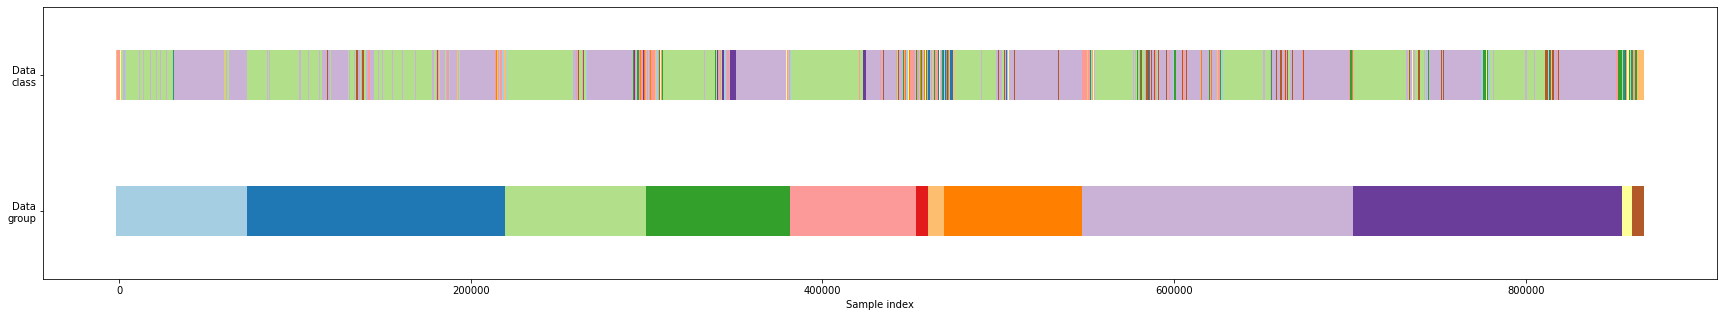

In [63]:
cmap_data = plt.cm.Paired
def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots(figsize=(30, 5))
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")
groups_number = preprocessing.LabelEncoder().fit(groups).transform(groups)
y_number = preprocessing.LabelEncoder().fit(y).transform(y)
visualize_groups(y_number, groups_number, 'no groups')

In [49]:
groups_number

array([  0,   0,   0, ..., 144, 144, 144])

In [58]:
print(pd.Series(groups_number).value_counts().to_string())

95     72046
28     71927
104    71926
114    71924
11     71900
109    71886
13     70583
14     70197
101    70186
45     69843
51     63579
52      3033
38      2681
132     2621
23      2482
96      2392
31      2266
36      2255
61      2192
47      2003
118     1895
99      1867
102     1767
113     1709
39      1708
81      1683
55      1634
110     1545
103     1429
71      1406
30      1377
130     1305
41      1276
94      1244
35      1221
89      1213
100     1141
87      1078
15      1029
76      1020
105      984
97       984
73       963
111      924
60       907
112      899
40       894
108      883
79       870
119      848
82       836
18       829
106      821
126      817
33       809
77       802
74       790
62       780
34       755
56       728
128      697
16       633
88       620
59       617
78       595
75       594
24       582
93       563
3        563
7        537
120      534
124      532
2        530
32       504
42       488
26       486
58       454

<AxesSubplot:>

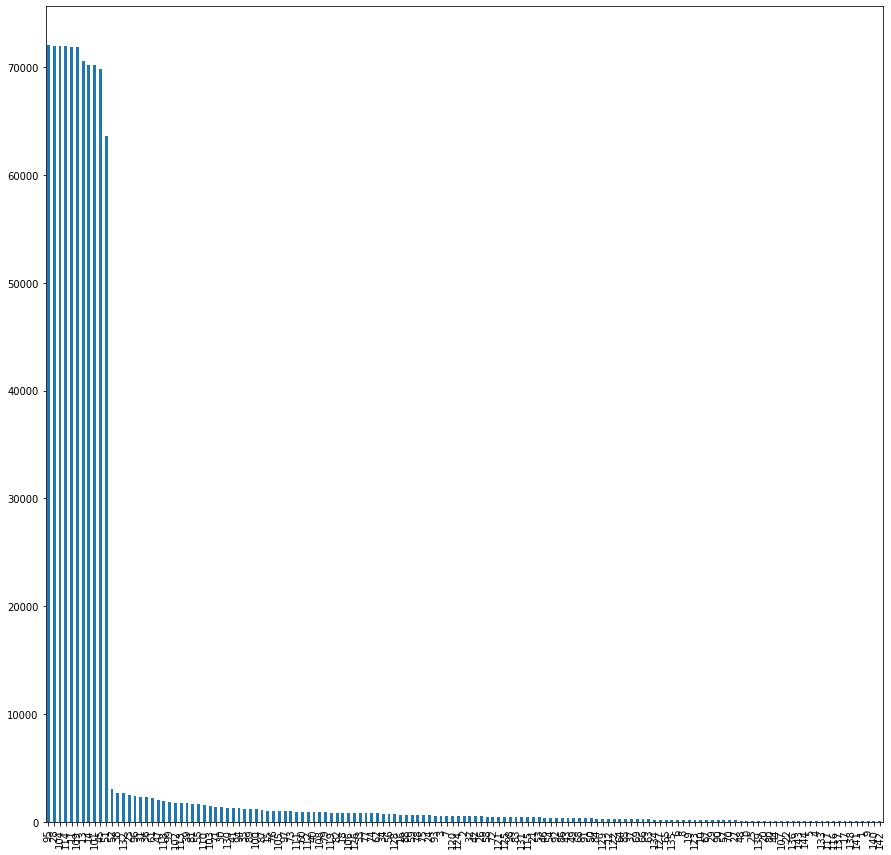

In [67]:
pd.Series(groups_number).value_counts().plot.bar(figsize=(15,15))

In [1]:
print("fppp")

fppp
